**Mitigation Model** for the **HL** Category: High Vulnerability and Low Resilience

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SequentialFeatureSelector

In [5]:
# Read in data and define x and y
df = pd.read_csv('3_mitigation_HL.csv')
y = df['m_mean']
x = df.drop(['NAME','Kmeans_t','resilience','m_w','m_un','m_mean'], axis = 1)

,NAME,Kmeans_t,resilience,m_w,m_un,m_mean,eduR,EnglishR,age1565R,politR,civic_1000,pov_lineR,median,income,home_ownR,imperviousR,wetlandR,NDVI,GI_R,parkA
0,5007.0,HL,6.255156,7.135604,6.829208,6.982406,0.502871,-0.753208,-0.660437,-0.619499,-0.553172,-0.240915,-0.718009,-0.551935,-0.905389,0.171651,-0.131477,0.035900,-0.397399,-0.584170
1,5009.0,HL,6.468335,7.284509,6.959026,7.121768,0.720233,-0.620739,-0.032067,-0.149059,-0.310138,0.291575,-0.635034,-0.511220,-0.372792,0.246722,-0.131477,-0.651132,-0.397399,-0.387788
2,5010.0,HL,6.524633,7.573599,7.297610,7.435605,0.018747,-1.297175,-0.171557,-0.353302,-0.553172,0.682966,-0.572350,-0.132249,-0.525772,0.285137,-0.131477,-2.251982,-0.397399,-0.525338
3,5011.0,HL,6.584090,7.638001,7.352898,7.495449,0.641192,0.100793,0.242928,-0.292029,1.274664,1.279979,-0.491186,-0.728165,0.189551,0.391422,-0.131477,-1.644993,-0.397399,-0.584170
4,5012.0,HL,6.178402,7.483200,7.215587,7.349394,0.479818,-0.863128,-0.429282,-0.217140,-0.553172,0.858809,-0.640469,-0.606022,-0.715580,0.359040,-0.131477,-2.305343,-0.397399,-0.584170
5,5013.0,HL,6.503825,7.474235,7.148132,7.311184,-0.045473,-0.772937,-0.020111,-0.138847,-0.262344,0.853136,-0.616193,-0.414790,-0.130574,0.493098,-0.131477,-0.966299,-0.397399,-0.570912
6,5016.0,HL,6.440797,6.934502,6.593820,6.764161,-0.411036,-0.975868,0.383746,-0.305645,-0.553172,0.029939,-0.474881,-0.659542,-0.092329,0.178229,-0.131477,-0.035805,-0.397399,0.677813
7,5019.0,HL,6.505708,7.234807,6.879967,7.057387,-0.119574,-0.181055,-1.044366,-0.850294,-0.553172,0.690766,-0.605685,-0.231807,-0.270805,0.347937,-0.131477,0.064248,-0.397399,-0.584170
8,5026.0,HL,6.378222,6.551247,6.285795,6.418521,0.206469,0.030331,-0.188827,-0.472444,-0.098289,0.930422,-0.444083,-0.802125,0.182469,-0.423007,-0.131477,-0.125853,-0.384443,2.211582
9,5027.0,HL,6.246549,7.412674,7.131691,7.272182,0.848674,-0.350164,-0.570100,0.501797,-0.185219,0.770887,-0.606173,-0.882825,-0.460614,0.101596,-0.131477,0.042570,-0.397399,-0.584170


1. Run the random forest mitigation model

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_e

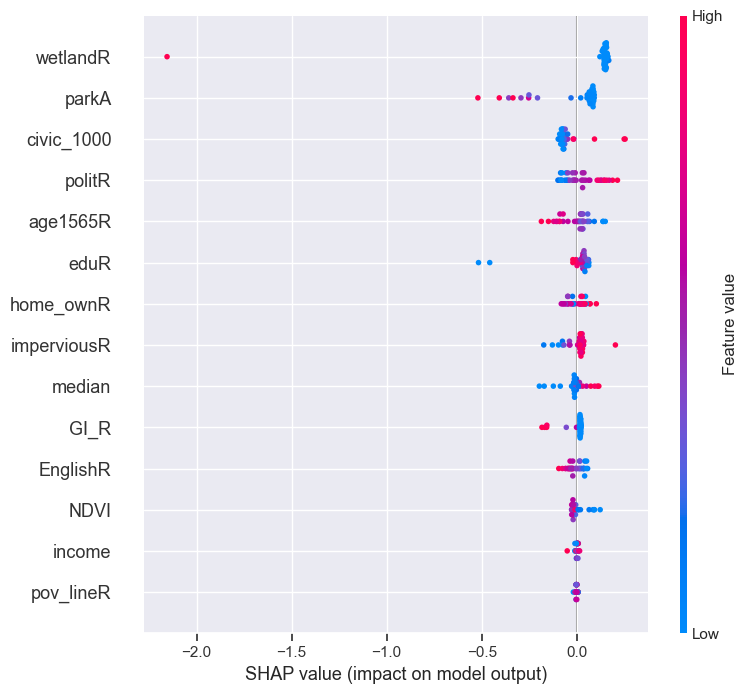

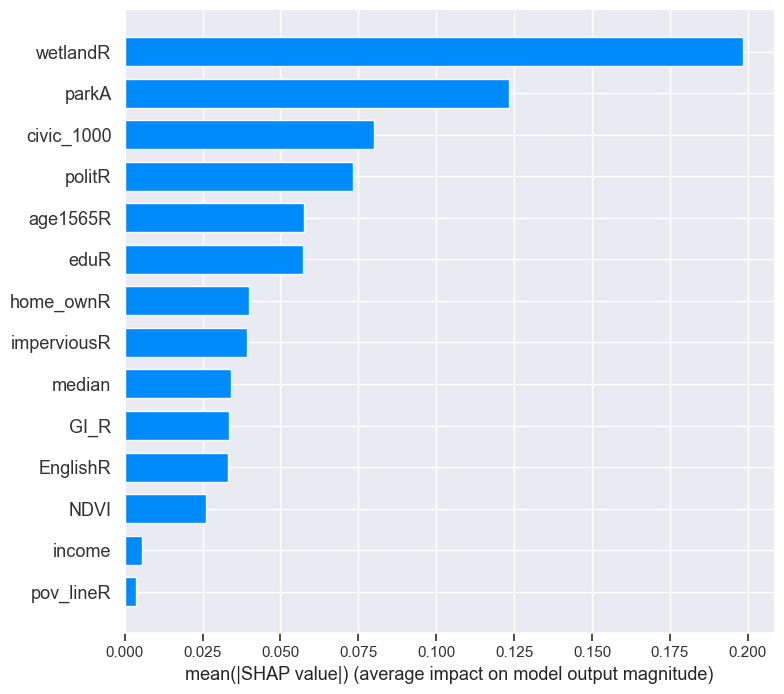

[0.6019]
[0.6551548533554867]
[0.3705059006414344]
[0.2375797640541466]
[0.7762429008487599]
{'max_depth': 20, 'max_features': None, 'n_estimators': 50}


In [11]:
# Lists to store performance metrics
R2_CV_list = [] # Cross-validated R² scores
R2_oob_list = [] # Out-of-bag R² score
RMSE_list = [] # Root Mean Squared Error
MAE_list = [] # Mean Absolute Error
R2_list = [] # R² scores

# Run the model for a specific random state (seed = 42)
for i in range(42, 43):
    # Split data into training and testing sets (70% train, 30% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    
    # Define a parameter grid for GridSearchCV to find the best hyperparameters
    my_param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'max_depth': [10, 20, 30],  # Maximum depth of the trees (None allows unlimited depth)
    }

    # Use GridSearchCV to find the best combination of parameters
    grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = i), 
        param_grid = my_param_grid, 
        refit = True, 
        verbose=2, 
        cv=5
    )
    grid.fit(x_train, y_train)
    
    # Extract the best hyperparameters after GridSearchCV
    best_params = grid.best_params_
    max_depth_value = best_params.get('max_depth')
    max_features_value = best_params.get('max_features')
    n_estimators_value = best_params.get('n_estimators')

    # Train the RandomForestRegressor with the best parameters
    RF_regression = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value, 
        random_state = i
    )
    RF_regression.fit(x_train, y_train)
    y_hat = RF_regression.predict(x_test) # Predict test set

    # Store predictions in a DataFrame for reference
    predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
    
    # Calculate cross-validated R² score
    R2 = cross_val_score(
        estimator = RandomForestRegressor(
            max_depth = max_depth_value, 
            max_features= max_features_value, 
            n_estimators= n_estimators_value, 
            random_state = i
        ), 
        X = x_train, 
        y = y_train, 
        cv = 5, 
        scoring = "r2"
    )
    R2_CV = round(np.mean(R2),4)
    R2_CV_list.append(R2_CV)

    # Calculate out-of-bag R² score
    RF_oob = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value,
        oob_score=True,
        random_state = i
    )
    RF_oob.fit(x_train, y_train)
    R2_oob_list.append(RF_oob.oob_score_)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    RMSE_list.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_hat)
    MAE_list.append(mae)
    
    # Calculate R²
    r2 = r2_score(y_test, y_hat)
    R2_list.append(r2)

    # Perform permutation importance analysis
    rf = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value, 
        oob_score=True, 
        random_state = i
    )
    rf.fit(x_train, y_train)
    result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=i)

    # Extract feature importance and sort by importance
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    sorted_idx = perm_importances.argsort()
    feature_names = x_test.columns
    pd.DataFrame(
        {'Importance': perm_importances, "Std": perm_std},
        index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Calculate feature importance using PermutationImportance
    rf_1 = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value,
        oob_score=True, 
        random_state = i
    )
    rf_1.fit(x_train,y_train)
    perm = PermutationImportance(rf_1, random_state = i).fit(x_test, y_test)
    importance = perm.feature_importances_

    feature_names = x_test.columns
    pd.DataFrame({'Importance': importance},
             index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Use SHAP to explain the predictions
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, features = x_test)
    shap.summary_plot(shap_values, features=x, feature_names=x_test.columns, plot_type='bar')

# Print the collected metrics and the best parameters from GridSearchCV
print("Cross-validated R² scores:", R2_CV_list)
print("Out-of-bag R² scores:", R2_oob_list)
print("RMSE values:", RMSE_list)
print("MAE values:", MAE_list)
print("R² scores:", R2_list)
print("Best parameters:", grid.best_params_)

2. Backward feature selection

In [15]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model with out-of-bag error estimation
rf_model = RandomForestRegressor(
    max_depth = 20, 
    max_features = None, 
    n_estimators=50, 
    random_state=42
)

sfs = SequentialFeatureSelector(
    rf_model, 
    n_features_to_select="auto", 
    direction='backward', 
    cv=5
)
sfs.fit(x_train, y_train)

# Selected features
selected_features = x.columns[sfs.get_support()]
print("Selected features with Sequential Feature Selector:", selected_features)


Selected features with Sequential Feature Selector: Index(['eduR', 'age1565R', 'politR', 'civic_1000', 'wetlandR', 'NDVI',
       'parkA'],
      dtype='object')


                 eduR  EnglishR  age1565R    politR  civic_1000  pov_lineR  \
eduR         1.000000  0.093509 -0.226410 -0.191340    0.148195   0.105877   
EnglishR     0.093509  1.000000  0.647025  0.200210    0.300699  -0.240806   
age1565R    -0.226410  0.647025  1.000000  0.070310    0.271768  -0.287219   
politR      -0.191340  0.200210  0.070310  1.000000    0.369871  -0.108378   
civic_1000   0.148195  0.300699  0.271768  0.369871    1.000000  -0.036533   
pov_lineR    0.105877 -0.240806 -0.287219 -0.108378   -0.036533   1.000000   
median      -0.187365  0.190989  0.248945  0.018834    0.312160   0.046818   
income       0.066121 -0.071080 -0.069033 -0.111808   -0.134707  -0.529911   
home_ownR    0.171032 -0.005853 -0.235600  0.157308   -0.204061  -0.143098   
imperviousR  0.327509  0.296718  0.139983  0.000192    0.199545   0.171228   
wetlandR    -0.175971 -0.030713 -0.039084 -0.006679   -0.034962  -0.116614   
NDVI        -0.250775 -0.354721 -0.241251 -0.014837   -0.275579 

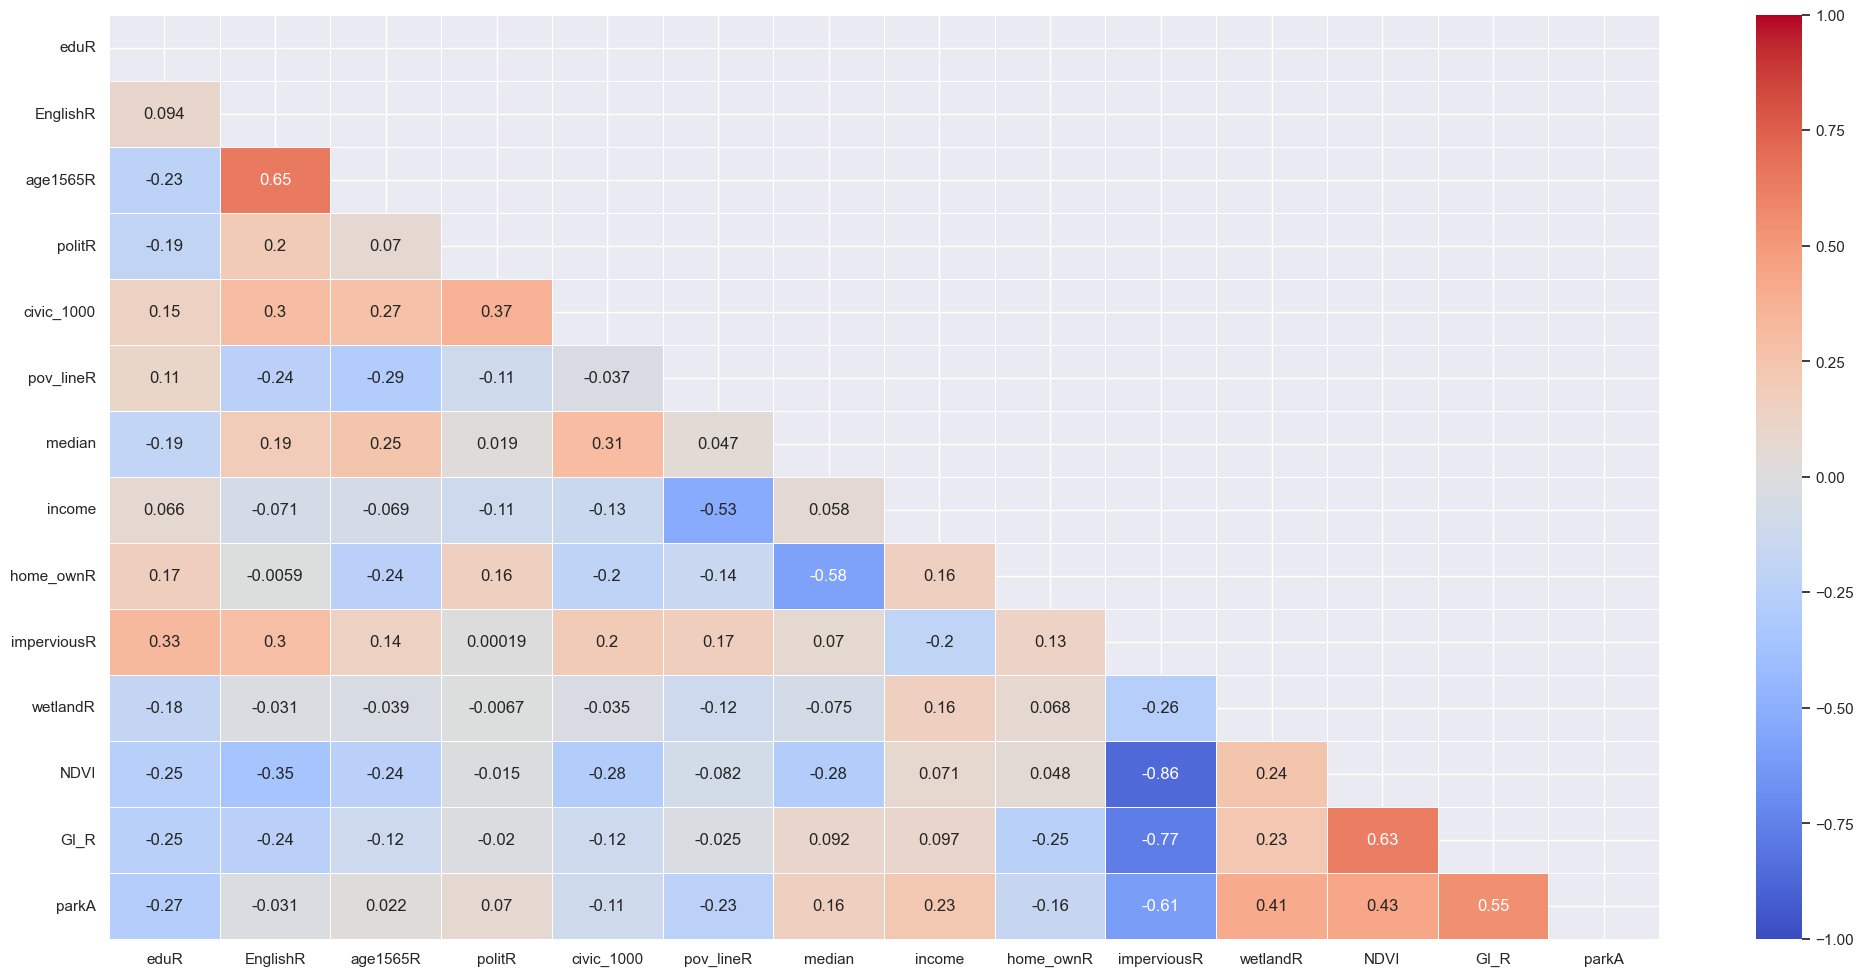

In [17]:
# Calculate the correlation matrix to analyze the relationships between features
correlation_matrix = x.corr()
print(correlation_matrix)

# Create a mask to only show the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(25, 12))

# Plot the heatmap with the x-axis labels aligned horizontally
sns.heatmap(
    correlation_matrix, 
    mask=mask, 
    annot=True, 
    cmap="coolwarm",
    vmin=-1, 
    vmax=1, 
    center=0, 
    linewidths=0.5, 
    linecolor='white',
    cbar_kws={"orientation": "vertical"}
)

# Rotate the x-axis labels to be horizontal
plt.xticks(rotation=0)

# Show the plot
plt.show()

3. Rerun the random forest exposure model

In [ ]:
y = df['m_mean']
x = df[['eduR', 'age1565R', 'politR', 'civic_1000', 'wetlandR', 'NDVI',
       'parkA']]

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_e

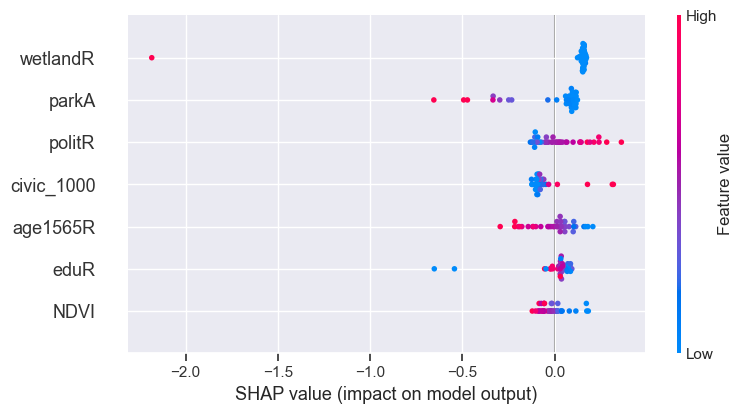

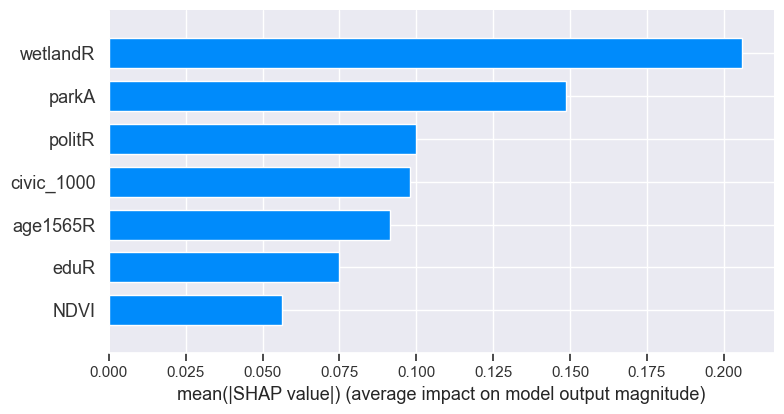

[0.711]
[0.7248197645421264]
[0.3600114034830316]
[0.23502336228819595]
[0.7887391221382523]
{'max_depth': 10, 'max_features': None, 'n_estimators': 50}


In [23]:
# Lists to store performance metrics
R2_CV_list = [] # Cross-validated R² scores
R2_oob_list = [] # Out-of-bag R² score
RMSE_list = [] # Root Mean Squared Error
MAE_list = [] # Mean Absolute Error
R2_list = [] # R² scores

# Run the model for a specific random state (seed = 42)
for i in range(42, 43):
    # Split data into training and testing sets (70% train, 30% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    
    # Define a parameter grid for GridSearchCV to find the best hyperparameters
    my_param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'max_depth': [10, 20, 30],  # Maximum depth of the trees (None allows unlimited depth)
    }

    # Use GridSearchCV to find the best combination of parameters
    grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = i), 
        param_grid = my_param_grid, 
        refit = True, 
        verbose=2, 
        cv=5
    )
    grid.fit(x_train, y_train)
    
    # Extract the best hyperparameters after GridSearchCV
    best_params = grid.best_params_
    max_depth_value = best_params.get('max_depth')
    max_features_value = best_params.get('max_features')
    n_estimators_value = best_params.get('n_estimators')

    # Train the RandomForestRegressor with the best parameters
    RF_regression = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value, 
        random_state = i
    )
    RF_regression.fit(x_train, y_train)
    y_hat = RF_regression.predict(x_test) # Predict test set

    # Store predictions in a DataFrame for reference
    predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
    
    # Calculate cross-validated R² score
    R2 = cross_val_score(
        estimator = RandomForestRegressor(
            max_depth = max_depth_value, 
            max_features= max_features_value, 
            n_estimators= n_estimators_value, 
            random_state = i
        ), 
        X = x_train, 
        y = y_train, 
        cv = 5, 
        scoring = "r2"
    )
    R2_CV = round(np.mean(R2),4)
    R2_CV_list.append(R2_CV)

    # Calculate out-of-bag R² score
    RF_oob = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value,
        oob_score=True,
        random_state = i
    )
    RF_oob.fit(x_train, y_train)
    R2_oob_list.append(RF_oob.oob_score_)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    RMSE_list.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_hat)
    MAE_list.append(mae)
    
    # Calculate R²
    r2 = r2_score(y_test, y_hat)
    R2_list.append(r2)

    # Perform permutation importance analysis
    rf = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value, 
        oob_score=True, 
        random_state = i
    )
    rf.fit(x_train, y_train)
    result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=i)

    # Extract feature importance and sort by importance
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    sorted_idx = perm_importances.argsort()
    feature_names = x_test.columns
    pd.DataFrame(
        {'Importance': perm_importances, "Std": perm_std},
        index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Calculate feature importance using PermutationImportance
    rf_1 = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value,
        oob_score=True, 
        random_state = i
    )
    rf_1.fit(x_train,y_train)
    perm = PermutationImportance(rf_1, random_state = i).fit(x_test, y_test)
    importance = perm.feature_importances_

    feature_names = x_test.columns
    pd.DataFrame({'Importance': importance},
             index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Use SHAP to explain the predictions
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, features = x_test)
    shap.summary_plot(shap_values, features=x, feature_names=x_test.columns, plot_type='bar')

# Print the collected metrics and the best parameters from GridSearchCV
print("Cross-validated R² scores:", R2_CV_list)
print("Out-of-bag R² scores:", R2_oob_list)
print("RMSE values:", RMSE_list)
print("MAE values:", MAE_list)
print("R² scores:", R2_list)
print("Best parameters:", grid.best_params_)